In [9]:
import os

import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [4]:
images_path = '/home/olga/PycharmProjects/2-edu/cvr-hw2-segmdet/data/barcodes-annotated-gorai/images/train/'
annotations_path = '../../data/barcodes-annotated-gorai/full_annotation.tsv'

In [12]:
os.path.split(annotations_path)[0]

'../../data/barcodes-annotated-gorai'

In [13]:
def train_val_split(annotations_path: str, test_size: float):
    annot_df = pd.read_csv(annotations_path, sep='\t')
    train_df, val_df = train_test_split(annot_df, test_size=test_size)
    data_root = os.path.split(annotations_path)[0]
    labels_path = os.path.join(data_root, 'labels')
    train_df.to_csv(os.path.join(labels_path, 'train_annotations.tsv'))
    val_df.to_csv(os.path.join(labels_path, 'val_annotations.tsv'))

In [14]:
train_val_split(annotations_path, test_size=0.1)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/barcodes-annotated-gorai/full_annotation.tsv'

In [10]:
train_df, val_df = train_test_split(annot_pd, test_size=0.2)

In [11]:
train_df

,filename,code,p1,p2
142,25a674bc-935d-4f1a-8071-ac86d1bb64cc--ru.2b0fe...,4606272009671,"(314, 72)","(728, 824)"
493,111fde2c-83c5-4abd-a72d-59831f4c90f1--ru.fc328...,4600697060583,"(540, 162)","(644, 406)"
419,77c7bd8d-bb64-4c4b-94c5-798a903eaa4d--ru.12f59...,4820240030508,"(657, 173)","(950, 762)"
132,5f625b96-67ae-4000-9d1c-840f720e2897--ru.30adf...,4630007400419,"(704, 1088)","(1691, 3062)"
234,e97ed90b-6c78-43ee-9d63-e145f65c1eb7--ru.e809d...,4607010731205,"(619, 322)","(838, 780)"
...,...,...,...,...
377,686190eb-7708-490e-9007-ccabd7b8b04f--ru.31ec2...,4607058800239,"(608, 109)","(1074, 971)"
400,e41b666a-8eeb-441f-9e41-577f364af356--ru.c1437...,4631145728441,"(677, 337)","(861, 702)"
396,68a47d6d-916d-4f4c-9baa-089c69bd839a--ru.9b79b...,4640001890031,"(587, 203)","(863, 718)"
525,e97ed90b-6c78-43ee-9d63-e145f65c1eb7--ru.e809d...,4607010731205,"(619, 322)","(838, 780)"


In [5]:
annot_pd = pd.read_csv(annotations_path, sep='\t')
annot_pd.head()

,filename,code,p1,p2
0,c234c76c-d72d-4d60-8066-e99f62361c1c--ru.a6a77...,4810153026194,"(542, 210)","(685, 489)"
1,0b56af7e-386c-410a-8f46-74350f755d77--ru.4c720...,8714100708408,"(474, 216)","(782, 625)"
2,77c7bd8d-bb64-4c4b-94c5-798a903eaa4d--ru.12f59...,4820240030508,"(657, 173)","(950, 762)"
3,5d60b81b-e31d-4530-bed1-27a8872d1f02--ru.53fed...,4607001770350,"(665, 66)","(841, 615)"
4,bb225480-a447-4232-85ab-ce22f1dec070--ru.09dd5...,4605035006964,"(592, 269)","(839, 717)"


In [26]:
row = next(iter(annot_pd.itertuples()))
row.filename

'c234c76c-d72d-4d60-8066-e99f62361c1c--ru.a6a77966-14c1-49d8-bdd3-c9cbf12ae35d.jpg'

In [7]:
def prepare_annotations(images_path: str, annotations_path: str):
    annot_df = pd.read_csv(annotations_path, sep='\t')
    for img_row in tqdm(annot_df.itertuples()):
        image_path = os.path.join(images_path, img_row.filename)
        image = cv2.imread(image_path)

        p1_p2 =(img_row.p1, img_row.p2)
        p1_p2 = tuple(map(lambda x: x.replace('(', '').replace(')', '').split(','), p1_p2))
        p1, p2 = tuple(map(lambda x: (int(x[0]), int(x[1])), p1_p2))
        y_min, x_min = p1
        y_max, x_max = p2
        h_abs, w_abs, _ = image.shape

        xc = (x_min + x_max) / 2 / w_abs
        yc = (y_min + y_max) / 2 / h_abs
        h = (y_max - y_min) / h_abs
        w = (x_max - x_min) / w_abs

        annot_path = image_path.replace('images', 'labels').replace('jpg', 'txt')
        with open(annot_path, 'w') as file_txt:
            line = f'{xc} {yc} {h} {w}'
            file_txt.write(line)

In [8]:
prepare_annotations(images_path, annotations_path)

540it [00:13, 39.25it/s]


In [39]:
p1_p2 = list(annot_pd.loc[0, ['p1', 'p2']])
p1_p2 = tuple(map(lambda x: x.replace('(', '').replace(')', '').split(','), p1_p2))
p1, p2 = tuple(map(lambda x: (int(x[0]), int(x[1])), p1_p2))
y_min, x_min = p1
y_max, x_max = p2

y_min, x_min, y_max, x_max

(542, 210, 685, 489)

In [40]:
h_abs, w_abs, _ = img.shape
h_abs, w_abs

(1333, 1000)

In [42]:
xc = (x_min + x_max) / 2 / w_abs
yc = (y_min + y_max) / 2 / h_abs
h = (y_max - y_min) / h_abs
w = (x_max - x_min) / w_abs

xc, yc, h, w

(0.3495, 0.4602400600150037, 0.1072768192048012, 0.279)

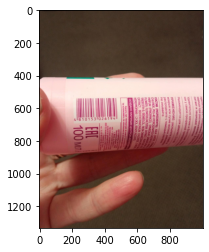

In [43]:
img = cv2.imread(os.path.join(root, annot_pd.loc[0, 'filename']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)